# Neuronale Netze

In diesem Kapitel schauen wir uns *Neuronale Netze* an. Diese sind in der *KI* weit verbreitet und haben eine breite Anwendung in allen möglichen Systemen.

*Neuronale Netze* können auch wie *Entscheidungsbäume* zur Klassifizierung verwendet werden. Ein sehr beliebtes Beispiel ist die Erkennung von handschriftlichen Ziffern. Bis wir soweit sind, müssen zuerst noch einige Grundlagen gelegt werden. Ganz am Ende werden wir ein *Neuronales Netz* trainieren, welches von Hand geschriebene Ziffern erkennen kann.

## Das Perceptron

*Neuronale Netze* sind vom biologischen Prinzip des Gehirns inspiriert. Ein Gehirn besteht jeweils aus vielen **Neuronen** welche untereinander Verknüpft sind.

Ein einzellnes solches **Neuron** kann bereits für die *KI* verwendet werden, dabei spricht man dann von einem **Perceptron**.

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmiro.medium.com%2Fmax%2F1200%2F1*7pwA1DjBw6JDkwZQecUNiw.png&f=1&nofb=1)

Ein **Perceptron** besteht aus mehreren Elementen.

- **Inputs**: Das sind die Signale die bei dem **Percepton** an den verschiedenen Stellen ankommen. Dies ist den biologischen Dentriten nachempfunden.
- **Gewichte**: Jeder **Input** hat ein **Gewicht**. Das soll verdeutlichen wie stark ein **Input** mit dem **Perceptron** verbunden ist.
- **Körper**: Dieser ist im Bild mit $y$ bezeichnet. Im Körper werden alle **Inputs** aufsummiert, und dann noch durch eine **Aktivierungsfunktion** geschickt.
- **Aktivierungsfunktion**: Das ist eine Funktion die entscheidet ob das **Perceptron** ein starkes oder ein schwaches Signal weiter gibt.
- **Output**: Das Signal welches von einem **Perceptron** weitergegeben wird.

## Gewichte

Das einzige was wir an dem System kontollieren können, sind die **Gewichte**. Über die Anpassung der Gewichte, können wir den **Output** steuern.

**Aufgabe:**
> Sie finden hier einen kleinen Datensatz mit 4 Einträgen. Die **Inputs** sind nummeriert, und das **Label** bestimmt was heraus kommen soll.
>
> Zeichnen Sie auf Papier ein Perceptron auf, das für diesen Datensatz verwendet werden kann.
>
> Versuchen Sie durch ausprobieren, die Gewichte so hinzubekommen, dass der **Output** den **Labels** entspricht. 

|Input 1|Input 2|Label|
|---|---|---|
|1|0|0|
|0|0|0|
|0|1|0|
|1|1|1|

## Aktivierungsfunktion

Sie merken recht schnell dass Sie nur durch das aufsummieren der **Inputs** nicht die gewünschten **Labels** erhalten können. DAfür ist die **Aktivierungsfunktion** gut. Hier können verschiedene Funktionen verwendet werden. Wir werden hier mal von einer einfachen Rundungsfunktion ausgehen. Also wenn die Summe grösser als 0.5 ist, runden wir auf 1, ansonsten runden wir ab.

**Wichtig:**
> Wir merken uns das wir nicht unbedingt die genauen **Labels** vorhersagen müssen. Die Resultate können später immer noch interpretiert werden, also wir können auch erst bei der Evaluation der Daten die Rundung vornehmen.

## Computer zur Hilfe

In der nächsten Zelle finden Sie Code der Ihnen den Datensatz von oben erzeugt. Wenn Sie die Zelle ausführen, finden Sie 2 Schieberegler darunter. Diese repräsentieren die **Gewichte** die Sie für das **Perceptron** bestimmen können.

**Aufgabe:**
> Führen Sie die Zelle aus, und stellen Sie die von Ihnen gefundenen **Gewichte** ein.

In [9]:
import ipywidgets as wdg
from math import exp
import numpy as np
from sklearn.datasets import make_classification
import pandas as pd
import seaborn as sns

def activation_function(x):
    return x
    #return 1 / (1 + exp(-x))

def calculate_output():
    weights = np.array([v.value for v in s[1:]])
    res = X.dot(weights)
    activation = np.vectorize(activation_function)
    res = activation(res)
    return res

def error(X, y):
    res = calculate_output()
    res = y - res
    res = [float(x)**2 for x in res]
    return sum(res)/len(res)

    
def update_table(args):
    with o:
        o.clear_output()
        pd_X = pd.DataFrame(X, columns=[f'Input[{i}]' for i in range(X.shape[1])])
        pd_y = pd.DataFrame(y, columns=['Labels'])
        res = calculate_output()
        res = pd.DataFrame(res, columns=['Output'])

        pd_all = pd.concat([pd_X, pd_y, res], axis=1)
        print(pd_all)
        err_val = error(X, y)
        print(f"Error: {err_val:.2f}")
    
X = np.array([[1, 0],
              [0, 1],
              [0, 0],
              [1, 1]])
y = np.array([0,
              0,
              0,
              1])

s = [wdg.HTML("<h2>Gewichte</h2>")]
for el in range(X.shape[1]):
    slider = wdg.FloatSlider(min=-5.0, max=5.0,
                             description=f"Gewicht[{el}]:")
    slider.observe(update_table, names='value')
    s.append(slider)


o = wdg.Output()

vbox = wdg.VBox(s)
layout = wdg.VBox([vbox, o])
display(layout)
update_table(None)

## Was ist hier passiert

Sie sehen dass wenn Sie an den Schiebereglern was verändern, erscheint eine Tabelle mit dem Datensatz von oben. Die Tabelle gibt auch gerade den **Output** für den jeweiligen Datenpunkt aus. So können Sie also in diesem recht kleinen Datensatz relativ schnell sehen ob Ihre **Gewichte** gut sind, oder in welche Richtug Sie diese anpassen müssen.

## Error

Keine Sorge, Sie haben keinen Fehler gemacht. Der **Error** von dem hier die Rede ist, bezieht sich auf den Fehler der Vorhersage im Vergleich zum Datensatz. Sie sehen dies auch unter der Tabelle angezeigt.

Wenn Sie an den **Gewichten** etwas verändern, sehen Sie dass sich auch der Fehler mit verändert. Wenn der Fehler möglichst klein ist, haben Sie die **Gewichte** gut gewählt. Wenn der Fehler gross ist, müssen die **Gewichte** noch angepasst werden.

**Aufgabe:**
> Spielen Sie mit den Schiebereglern, und beschrieben Sie wie sich der Fehler verändert. Tauschen Sie Ihre Erkentnis mit Ihrem Sitznachbarn aus.

**Zusatz:**
> Wir verwenden hier die Methode *Mean Squarred Error*. Schuen Sie nach was genau man darunter versteht, und diskutieren Sie Ihre Erkentnis mit Ihrem Sitznachbarn.

## Grössere Datensätze

In der nächsten Zelle finden Sie Code der Ihnen einen grösseren Datensatz erzeugt, so wie bereits auf dem letzten Arbeitsblatt.

**Aufgabe**:
> Führen Sie die Zelle aus und ändern Sie die Gewichte.
> 
> - Was passiert mit dem Fehler?
> - Welches **Gewicht** hat am meisten Einfluss auf den Fehler?
> - Gibt es **Gewichte** die keinen Einfluss auf den Fehler haben?
> - Was sehen Sie im Datensatz?
> - Können Sie die **Gewichte** so einstellen das der Fehler möglichst klein ist?
>
> Tauschen Sie Ihre Erkentnis mit Ihrem Sitznachbarn aus.

In [6]:
X, y = make_classification(n_samples=10, n_features=4, n_informative=4, n_redundant=0, n_repeated=0, class_sep=10, n_clusters_per_class=1, shift=10, scale=0.05)
s = [wdg.HTML("<h2>Gewichte</h2>")]
for el in range(X.shape[1]):
    slider = wdg.FloatSlider(min=-5.0, max=5.0,
                             description=f"Gewicht[{el}]:")
    slider.observe(update_table, names='value')
    s.append(slider)


o = wdg.Output()

vbox = wdg.VBox(s)
layout = wdg.VBox([vbox, o])
display(layout)
update_table(None)

## Analyse des Datensatzes

Da der Datensatz zufällig erzeugt wird, können Sie mehr oder weniger Glück damit haben. Da der Datensatz noch relativ klein ist, lohnt es sich da genauer hinein zu schauen. Wir machen das auch wieder mit einem **Pair-Plot** den wir bereits vom letzten Arbeitsblatt kennen.

**Aufgabe:**
> In der nächsten Zelle finden Sie Code der Ihnen einen *Pair-Plot* von Ihrem Datensatz erzeugt. Führen Sie diese Zelle aus.
>
> Was fällt Ihnen auf wenn Sie den **Pair-Plot** betrachten und mit den Erkentnissen der letzten Aufgabe vergleichen?
>
> Suchen Sie sich das **Gewicht** aus das zu einem **Input** gehört bei dem die beiden Kurven in der Diagonale keine Überschneidungen haben. Was fällt Ihnen auf wenn Sie dieses Gewicht verändern?
>
> Reflektieren Sie die hier gewonnene Erkenntnis und vergleichen Sie diese mit der Erkenntnis zu **Pair-Plots** vom letzten Aufgabenblatt.

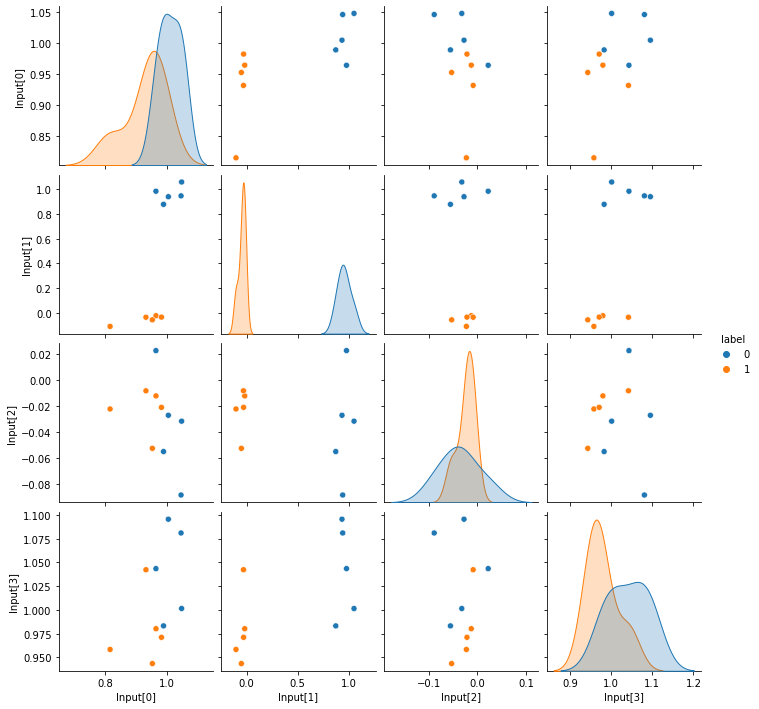

In [4]:
X_tmp = pd.DataFrame(X, columns=[f'Input[{i}]' for i in range(X.shape[1])])
y_tmp = pd.DataFrame(y, columns=['label'])
tmp = pd.concat([X_tmp, y_tmp], axis=1)
sns.pairplot(tmp, x_vars=[f'Input[{i}]' for i in range(X.shape[1])], y_vars=[f'Input[{i}]' for i in range(X.shape[1])], hue='label')

## Neuronale Netze

Mit einem einzelnen **Perceptron**, kann man bereits viel machen. Wie schon bei den **Entscheidungsbäumen**, gibt es auch hier eine Weiterenwicklung der Methode. Man kann nun verschiedene **Perceptrons** aneinander hängen, und damit ein **Neuronales Netz** erstellen. Diese **Neuronalen Netze** werden normalerweise in Schichten (sogennanten **Layers**) unterteilt.

## Ziffern vorhersagen

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fraw.githubusercontent.com%2Fyashk2810%2Fyashk2810.github.io%2Fmaster%2Fimages%2Fmnist.png&f=1&nofb=1)

Nun möchten wir aber gerne Ziffern vorhersagen können, und diese sind ja nicht in dem Format in dem die Datensätze von oben sind.

Das ist in der Tat ein wichtiger Punkt und diesen müssen wir zuerst klären. Wenn wir eine Ziffer vorhersagen möchten, dann müssen wir zuerst das Bild einer Ziffer haben. Wir verwenden dann verschiedene Techniken um das Bild auf eine Standardgrösse zu bekommen ($28 \times 28$ Pixel) und betrachten nur die Graustufen davon. Dann hat jeder Pixel einen Wert zwischen 0 und 1 und wenn wir die Pixel der Reihe nach aufreihen, haben wir einen Datensatz mit 784 **Inputs**.

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi2.wp.com%2Fwand-research.com%2Fwp-content%2Fuploads%2F2018%2F02%2Funderstanding-cnn.gif%3Fw%3D720%26ssl%3D1&f=1&nofb=1)

Die Graphik hier veranschaulicht sehr gut was bei einem Neuronalen Netzwerk abläuft. Nachdem das Bild in das passende Input-Format gebracht wurde, kann es durch das Netzwerk gefüttert werden. Dabei nach jeder Auswertung von einem **Preceptron** ein Signal weiter an das nächste **Perceptron** geschickt. Damit können sehr komplexe Funktionen nachgebaut werden. Wenn man dem Neuronalen Netz sehr viele Schichten und Neuronen pro Schicht gibt, könnne damit beliebig komplexe Funktionen approximiert werden.

## Training sehr aufwendig

Wie Sie an der Graphik oben sehen können, ist das TRaining sehr aufwendig, denn Sie müssen für jede der Kanten den richtigen Wert bestimmen, und es gibt sehr sehr viele Kanten in einem Neuronalen Netz. Zum Glück gibt es Trainingsmethoden die relativ gut funktionieren, und wenn man so ein Modell mal trainiert hat, kann man es auch speichern und wieder verwenden.

**Aufgabe:**
> In der nächsten Zelle finden Sie Code der Ihnen ein Modell importiert das bereits trainiert wurde. Das Modell kann Ziffern mehr oder weniger gut erkennen.
>
> Führen Sie die nächste Zelle aus, und prüfen Sie welche Ziffern das Modell wie gut erkennen kann.

In [ ]:
from ipycanvas import Canvas
from ipywidgets import Layout
import ipywidgets as wdg
import tensorflow as tf
import numpy as np


model = tf.keras.models.load_model('digits.model')

SCALING = 4

class Pen():
    is_down = False
    
    def put_down(self, x, y):
        self.is_down = True
        
    def take_up(self, x, y):
        self.is_down = False

def draw_pixel(x, y):
    if pen.is_down:
        canvas.fill_rect(x, y, 6, 6)
    
def predict_from_image(args):
    canvas.sync_image_data
    arr = canvas.get_image_data()
    small = arr[::SCALING, ::SCALING]
    small = small[:,:,3]
    small = small.reshape((1, 784))
    small = small / 255
    predict = model.predict(small)[0]
    tmp = np.where(predict == max(predict))[0]
    out.value = str(tmp[0])
    
def clear_canvas(args):
    canvas.clear()

        
pen = Pen()
canvas = Canvas(height=28*SCALING, width=28*SCALING, sync_image_data=True)
canvas.on_mouse_down(pen.put_down)
canvas.on_mouse_up(pen.take_up)
canvas.on_mouse_move(draw_pixel)
#canvas.observe(get_array, 'image_data')
canvas.layout = Layout(border='solid')

btn_predict = wdg.Button(description="Predict")
btn_predict.on_click(predict_from_image)
btn_clear = wdg.Button(description="Clear")
btn_clear.on_click(clear_canvas)
out = wdg.HTML()

wdg.HBox([canvas, btn_predict, btn_clear, out])

## Übertrainiert

Ein häufiges Problem das man bei **maschinellem Lernen** antrifft, ist das Problem von **Overfitting**.

**Aufgabe:**
> Führen Sie eine Internetrecherche zu den Begriffen **Overfitting** und **Generalization** durch. Besprechen Sie mit Ihrem Sitznachbarn was dies mit **maschinellem Lernen** zu tun hat, und wieso dies ein Problem sein könnte.